# Import Librairies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow



import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling

from tensorflow.keras import optimizers
print(tf.keras.__version__)

2.7.0


In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from os import listdir
from os.path import isfile, join
import os

In [ ]:
path = '/content/gdrive/MyDrive/XRays_poumons'
path_train = path+'/train'
path_test = path+'/test'
path_val = path + '/val'

In [ ]:
onlyfiles = [f for f in listdir(path_train) if isfile(join(path_train, f))]
#print(onlyfiles)

In [ ]:
os.chdir(path_train)
folder = listdir(os.getcwd())
files = []
for f in folder :
  os.chdir(f)
  files += [join(f,i) for i in listdir('.')]
  os.chdir('../')

print(len(files))
os.chdir(path)
os.getcwd()

5216


'/content/gdrive/MyDrive/XRays_poumons'

In [ ]:
"""
lines = []
col = []
for file_ in files:
    img = cv2.imread(os.path.join(path_train, file_),0)
    l,c = img.shape
    lines.append(l)
    col.append(c)
print(f'max lines : {max(lines)}')
print(f'max col : {max(col)}')
print(f'min lines : {min(lines)}')
print(f'min col : {min(col)}')
print(f'mean lines : {np.mean(lines)}')
print(f'mean col : {np.mean(col)}')"""

"\nlines = []\ncol = []\nfor file_ in files:\n    img = cv2.imread(os.path.join(path_train, file_),0)\n    l,c = img.shape\n    lines.append(l)\n    col.append(c)\nprint(f'max lines : {max(lines)}')\nprint(f'max col : {max(col)}')\nprint(f'min lines : {min(lines)}')\nprint(f'min col : {min(col)}')\nprint(f'mean lines : {np.mean(lines)}')\nprint(f'mean col : {np.mean(col)}')"

In [ ]:
img_width = 1000
img_height = 1500
batch_size = 10

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  directory=path_train,
  seed=42,
  color_mode = "grayscale",
  image_size=(img_width, img_height),
  batch_size= batch_size,
  label_mode = 'binary' ,
  )

class_names_train = train_data.class_names

Found 5216 files belonging to 2 classes.


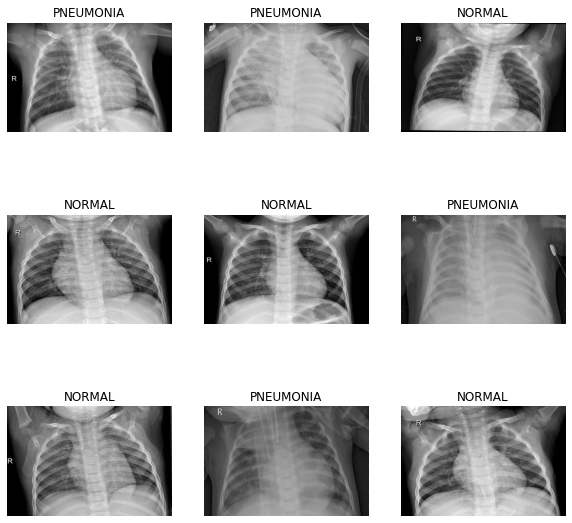

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images[i].numpy().reshape((img_width,img_height))
    #plt.imshow(images[i].numpy().astype("uint8"),cmap="gray")
    #cv2_imshow(images[i].numpy().astype("uint8"))
    plt.imshow(img,cmap="gray")
    plt.title(class_names_train[labels[i].numpy()[0].astype(int)])
    plt.axis("off")

In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
  directory=path_val,
  seed=42,
  color_mode = "grayscale",
  image_size=(img_width, img_height),
  batch_size= batch_size,
  label_mode = 'binary' ,
  )


test_data = tf.keras.utils.image_dataset_from_directory(
  directory=path_test,
  seed=42,
  color_mode = "grayscale",
  image_size=(img_width, img_height),
  batch_size= batch_size,
  label_mode = 'binary' ,
  )


Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


#Definition of the model model

In [ ]:
num_epochs = 3

In [ ]:
model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(activation = 'sigmoid', units = 1))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit( 
  train_data,
  validation_data=val_data,
  epochs=num_epochs,
)

Epoch 1/3
522/522 [==============================] - 363s 692ms/step - loss: 0.2357 - accuracy: 0.8967 - val_loss: 0.1964 - val_accuracy: 1.0000
Epoch 2/3
522/522 [==============================] - 359s 685ms/step - loss: 0.0901 - accuracy: 0.9680 - val_loss: 0.2869 - val_accuracy: 0.9375
Epoch 3/3
522/522 [==============================] - 357s 682ms/step - loss: 0.0718 - accuracy: 0.9720 - val_loss: 0.2153 - val_accuracy: 0.9375


In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 1000, 1500, 1)     0         
                                                                 
 conv2d (Conv2D)             (None, 998, 1498, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 499, 749, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 497, 747, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 248, 373, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 246, 371, 32)      9

In [ ]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 [==============================] - 18s 265ms/step - loss: 1.4160 - accuracy: 0.7676
Test loss: 1.416027307510376
Test accuracy: 0.7676281929016113
